# Rainfall Prediction - Weather Forecasting

#### Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

### 1.Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2.Importing the Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(8425, 23)

### Droping Duplicates

In [5]:
data.drop_duplicates()
data.shape

(8425, 23)

- No duplicates values are present.

### Checking unique values

In [6]:
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

## 3. EDA
### 3.1 Checking Null Values

In [7]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

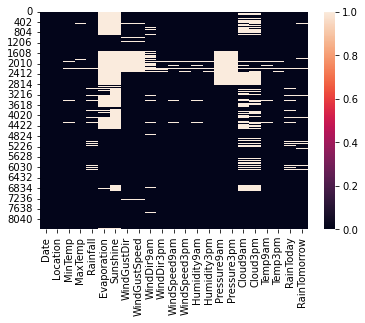

In [8]:
sns.heatmap(data.isnull())

- Except Date and location all features  are having null values.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### 3.2 Filling Null Values

#### For Continuous data

In [10]:
data["MinTemp"]=data["MinTemp"].replace('N',np.nan)

In [11]:
data['MinTemp']= data['MinTemp'].fillna(data['MinTemp'].mean())

In [12]:
data['MaxTemp']= data['MaxTemp'].fillna(data['MaxTemp'].mean())

data['Rainfall']= data['Rainfall'].fillna(data['Rainfall'].mean())

data['Evaporation']= data['Evaporation'].fillna(data['Evaporation'].mean())

data['Sunshine']= data['Sunshine'].fillna(data['Sunshine'].mean())

data['WindGustSpeed']= data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())

data['WindSpeed9am']= data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())

data['WindSpeed3pm']= data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())

data['Humidity9am']= data['Humidity9am'].fillna(data['Humidity9am'].mean())

data['Humidity3pm']= data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

data['Pressure9am']= data['Pressure9am'].fillna(data['Pressure9am'].mean())

data['Pressure3pm']= data['Pressure3pm'].fillna(data['Pressure3pm'].mean())

data['Cloud9am']= data['Cloud9am'].fillna(data['Cloud9am'].mean())

data['Cloud3pm']= data['Cloud3pm'].fillna(data['Cloud3pm'].mean())

data['Temp9am']= data['Temp9am'].fillna(data['Temp9am'].mean())

data['Temp3pm']= data['Temp3pm'].fillna(data['Temp3pm'].mean())


#### For Categorical Data

In [13]:
null_columns =['WindGustDir','WindDir9am','WindDir3pm']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True)

In [14]:
data['RainTomorrow'].value_counts()

No     6195
Yes    1991
N       239
Name: RainTomorrow, dtype: int64

In [15]:
data["RainToday"]=data["RainToday"].replace('N',np.nan)

In [16]:
data["RainTomorrow"]=data["RainTomorrow"].replace('N',np.nan)

In [17]:
data['RainToday']= data['RainToday'].fillna(data['RainToday'].mode()[0])

In [18]:
data['RainTomorrow']= data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [19]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [21]:
# Drop Date column:
data.drop('Date', axis = 1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


### 3.3 Univariate Analysis

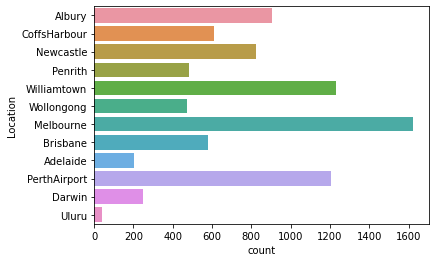

In [22]:
sns.countplot(y='Location',data=data)
plt.show()

- Melbourne has maximum common weather station where maximum area has been coverd followed by Williamtown.
- Uluru has lowest weather station where minimum area has been coverd followed by Adelaide.

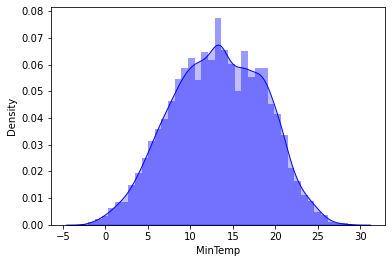

In [23]:
# Distribution plot for the column MinTemp
sns.distplot(data["MinTemp"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, the data is normaly distributed. 
- Maximum MinTemp lies in the range of 5 to 20. Before and after that Min temprature falls down.

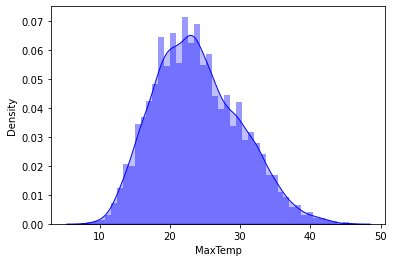

In [24]:
# Distribution plot for the column MaxTemp
sns.distplot(data["MaxTemp"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, Max temprature has right skewed.
- But maximum MaxTemp lies in the range of 13 to 30. In which the Max temprature has maximum where from 30 Max temp falls down.

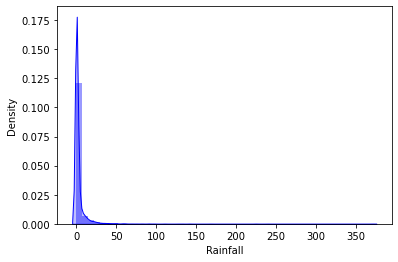

In [25]:
# Distribution plot for the column Rainfall
sns.distplot(data["Rainfall"],color="b",kde_kws={"shade": True},)
plt.show()

- Rainfall is not normaly distributed. Its a right skewed.
- Maximum rainsfalls in 0 to 50. After that is seem to have outliers.

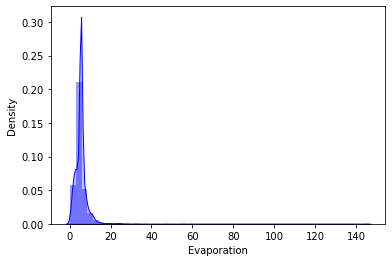

In [26]:
# Distribution plot for the column Evaporation
sns.distplot(data["Evaporation"],color="b",kde_kws={"shade": True},)
plt.show()

- Evaporation is not normaly distributed. Its a right skewed.
- Maximum Evaporation in 0 to 20. After that is seem to have outliers.

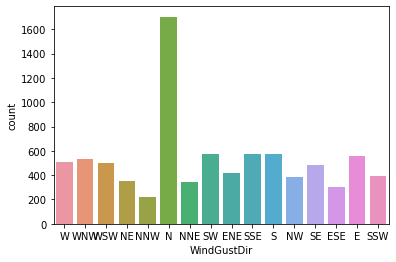

In [27]:
sns.countplot(x='WindGustDir',data=data)
plt.show()


- The 'N' type of WindGust has a strongest wind in midnight.
- The 'NNW' direction of WingGust has lowest wind in mindnight.

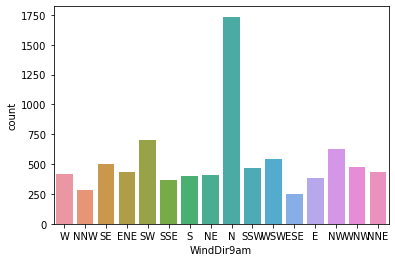

In [28]:
sns.countplot(x='WindDir9am',data=data)
plt.show()

- "North' has maximum wind direction at 9am followed by SouthWest.
- 'SouthEast' has mimimum wind direction at 9am followed NNW.

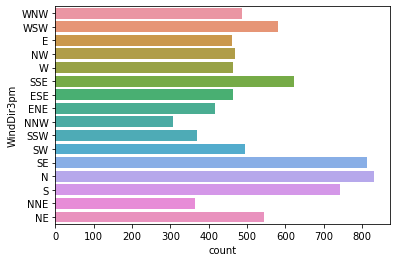

In [29]:
sns.countplot(y='WindDir3pm',data=data)
plt.show()

- 'North' wind has maximum direction at 3am followed by South East.
- NNW has minimum wind direction at 3am followed by SSW.

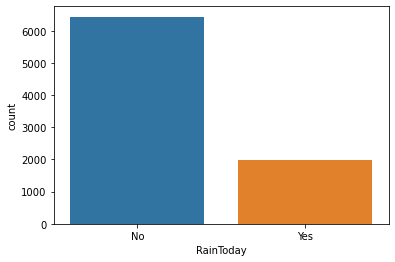

In [30]:
sns.countplot(x='RainToday',data=data)
plt.show()

- Maximum record show that RainToday has 'No'. It means Rain Today has more No. It mean there is rain in today.
- Very Few chance are having that Rain will come.

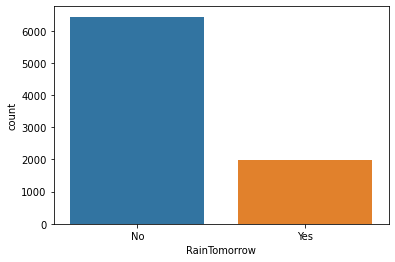

In [31]:
sns.countplot(x='RainTomorrow',data=data)
plt.show()

- Maximum record show that RainTomorrow has 'No'. It means Rain will fall tomorrow having very less chance.
- Very Few chance are having that Rain will come tomorrow.

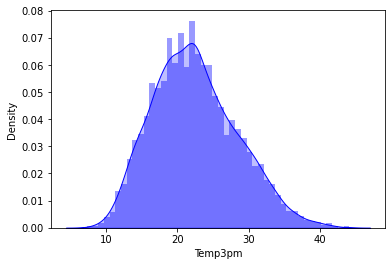

In [32]:
# Distribution plot for the column Temp3pm
sns.distplot(data["Temp3pm"],color="b",kde_kws={"shade": True},)
plt.show()

- Temp3pm is normaly distributed. But It haslittle right skewed.
- Maximum Temp3pm  fall in the range of 15 to 25. After that is seem to have outliers.

### 3.4 Bivariate Analysis

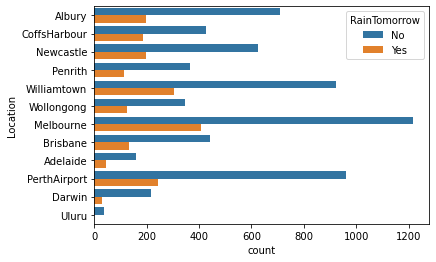

In [33]:
sns.countplot(y='Location',hue='RainTomorrow',data=data)
plt.show()

- In Melbourne location where has maximum chance that tomorrow there is no rainfall. But Comapring to others where tomorrow having rainfall.
- Darivin has lowest chance where tomorrow rain wiill comes.

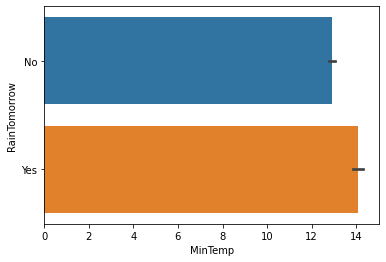

In [34]:
sns.barplot(x='MinTemp',y='RainTomorrow',data=data,)
plt.show()

- According to Min temperature, tomorrow have a chance that rainfall may possible. But at same parameter is say there also having  chance that tomorrow no rainfalls.
- But both prediction almost near to each others.

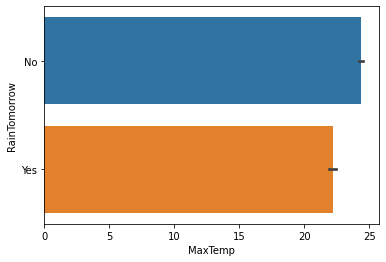

In [35]:
sns.barplot(x='MaxTemp',y='RainTomorrow',data=data)
plt.show()

- By according to Max Temp tomorrow has lowest chance for rainfall. But both prediction almost near to each others.
- So maximum Temperature has 22.

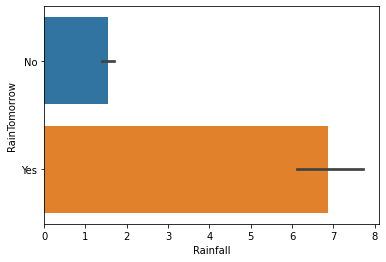

In [36]:
sns.barplot(x='Rainfall',y='RainTomorrow',data=data)
plt.show()

- We can see, It show that tomorrow has maximum chance of rainfall.
- Upt 7 mm rainfall may possible.

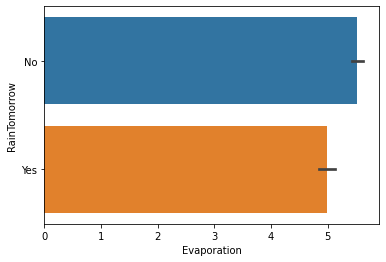

In [37]:
sns.barplot(x='Evaporation',y='RainTomorrow',data=data)
plt.show()

- According to Evaporation. Tomorrow has comparatively low chance for rainfalls.
- Upto 5 mm Evaporation will be tomorrow. 

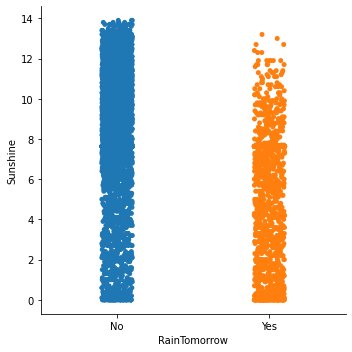

In [38]:
sns.catplot(x='RainTomorrow',y='Sunshine',data=data)
plt.show()

- According to sunshine, tomorrow have comparativley high chnace for no rainfall. It means tomorrow will be no rainfall. Sky will be clean.
- But comapring to Yes, It may have chance that, tomorrow will rain comes.

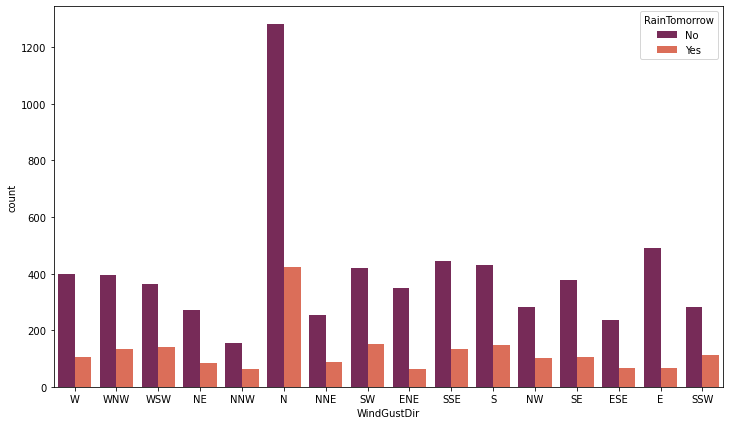

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindGustDir', hue='RainTomorrow',data=data,palette='rocket')
plt.show()

- We can see, Wind Gust direction shows that North direction wind may flow. and due to this no rainfall tomorrow. And It has maximum chance that there is no rainfall tomorrow.
- Similarly, By same wind it also show it might have a chance that there is some rainfall tomorrow. But comapring to no Rainfall it has very less chance to right. So it strongly possible that no rainfalls tomorrow by seen plot.

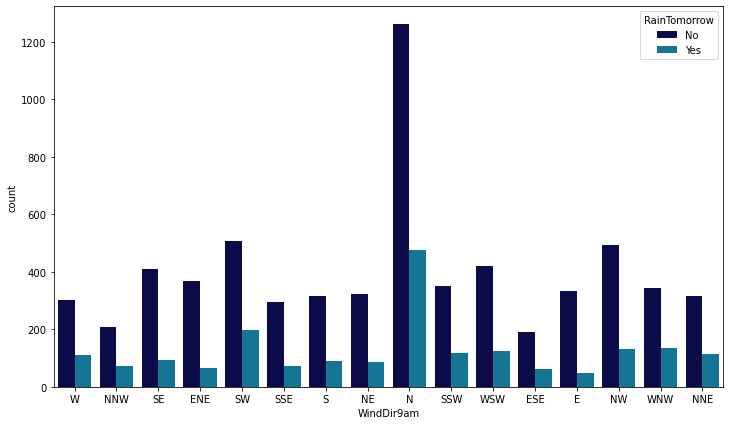

In [40]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir9am', hue='RainTomorrow',data=data,palette='ocean')
plt.show()

- Wind direction At 9am will be North.Because it show maximum possibility than others. And it also show there is no rainfall tomorroww.
- Very less chance will have for rainfall.

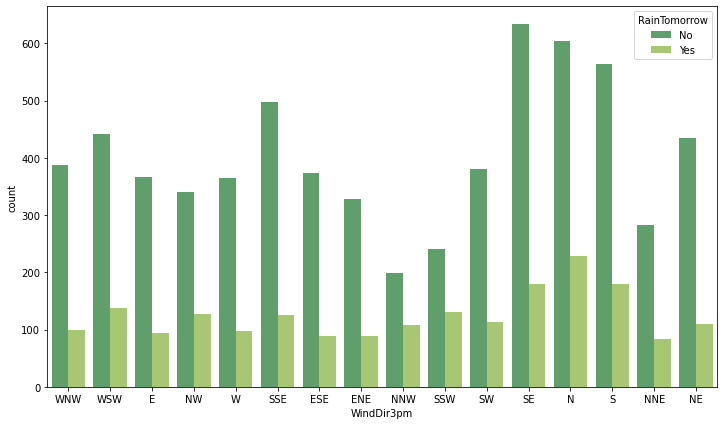

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(x='WindDir3pm', hue='RainTomorrow',data=data,palette='summer')
plt.show()

- We can see, At 3 am Wind direction may be SouthEast. It has maximum possibility that there is mo rainfall tomorrow.
- But at same time North wind direction also have more posssiblity that wind will flow tomorrow in North direction.
- According to graph there is no rainfall tomorrow.

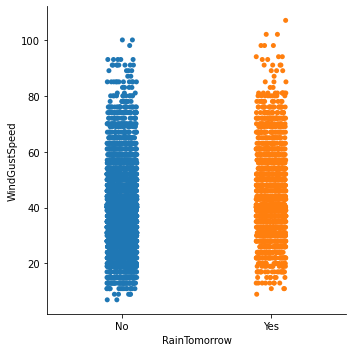

In [42]:
sns.catplot(x='RainTomorrow',y='WindGustSpeed',data=data)
plt.show()

- According to Wind gun speed, There are having maximum chance of rainfall tomorrow. But at same time its show also no rainfall tomorrow.
- Because both are having almost same proportion so that possibilities also in same proportion.

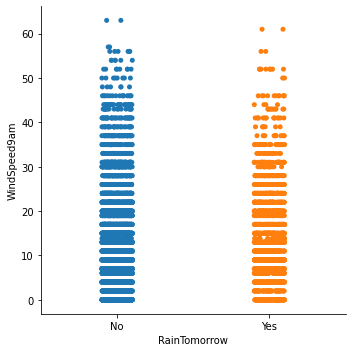

In [43]:
sns.catplot(x='RainTomorrow',y='WindSpeed9am',data=data)
plt.show()

- The maximum wind speed at 9 am are > 60. It shows that wind speed will > 60 but possibility for rainfall also low.
- But at same time, it show strong posibilities that, there is rainfall tomorrow.

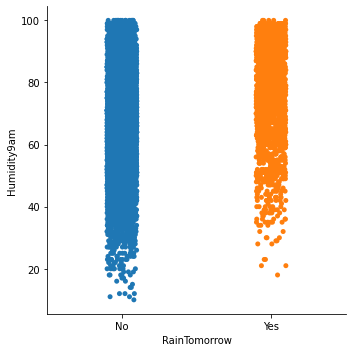

In [44]:
sns.catplot(x='RainTomorrow',y='Humidity9am',data=data)
plt.show()

- according to Humidity9am, it show humidity at 9 am will be or almost 100. so possibility so rainfall is high in tomorrow.

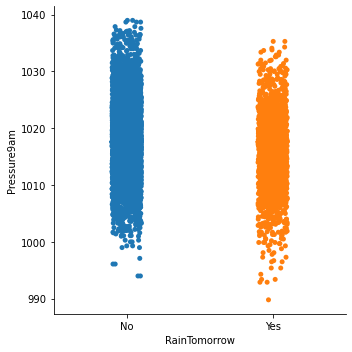

In [45]:
sns.catplot(x='RainTomorrow',y='Pressure9am',data=data)
plt.show()

- At 9 am the presure will be more than 1000 hpa so due this there is more possobility that there is no rainfall tomorrow.
- But at Same pressure it seem that it has some possibilities that there is rainfall tomorrow.

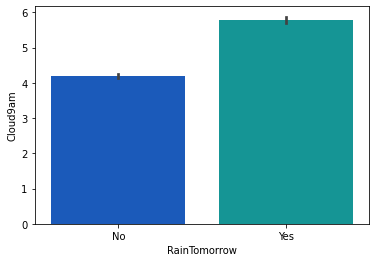

In [46]:
sns.barplot(x='RainTomorrow',y='Cloud9am',data=data,palette='winter')
plt.show()

- According to Cloud at 9 am it seem that, there is huge possibilities that there will be rainfall tomorrow.
- Fraction of sky obscured is minimum 4 tomorrow.

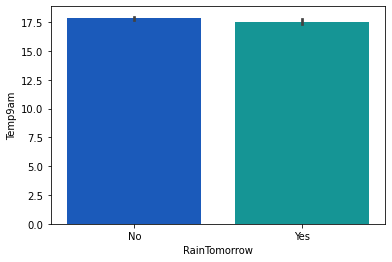

In [47]:
sns.barplot(x='RainTomorrow',y='Temp9am',data=data,palette='winter')
plt.show()

- According to Temp at 9 am is having both possibilities equally that rainfall may be or may not be possible.
- Average temp  is more than 17.5 degree C.

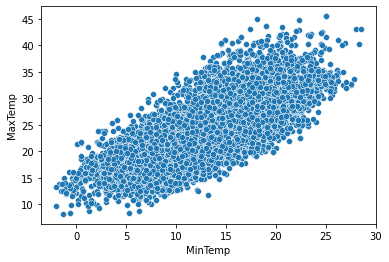

In [48]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=data)
plt.show()

- We can see, both features are having linear relationship with eachothers.
- As MinTem drop while MaxTemp increases.

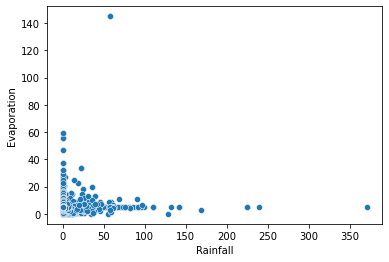

In [49]:
sns.scatterplot(x='Rainfall',y='Evaporation',data=data)
plt.show()

- There is no direct relationship betweem rainfall and evaporation.
- Maximum evaporation with respect to rainfall is 60. Whereas maximum rianfall with repect to evaporation is 150.

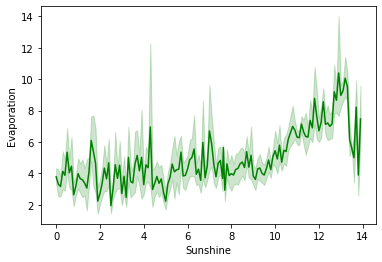

In [50]:
sns.lineplot(x='Sunshine',y='Evaporation',data=data, color='g')
plt.show()

- We can see, there is linear relation with each other.
- As Sunshine is increases then Evaporation also increases.

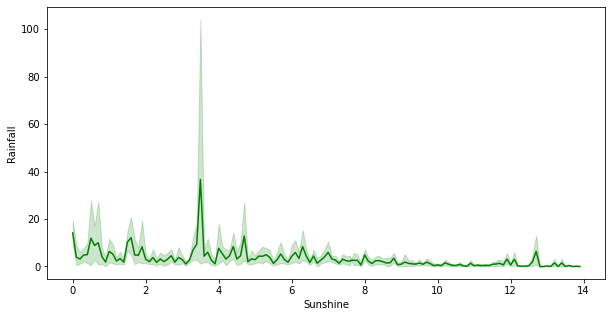

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='Sunshine',y='Rainfall',color='green')
plt.show()

- Here we can see the Sunshine is inversely proportional to Rainfall

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

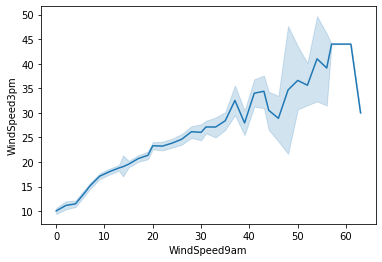

In [52]:
sns.lineplot(x='WindSpeed9am',y='WindSpeed3pm',data=data)

- we can see, Noth features are having linear relationship with each others.
- As Wind speed at 9 increase then wind speed at 3 also increases.

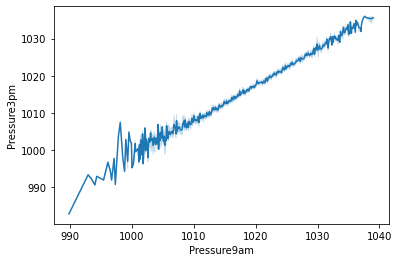

In [53]:
sns.lineplot(x='Pressure9am',y='Pressure3pm',data=data)
plt.show()

- We can see, pressure at 9 am has linear relation with pressure at 3 am.
- And both fetures are having positively relationship.

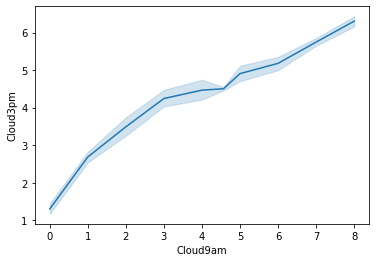

In [54]:
sns.lineplot(x='Cloud9am',y='Cloud3pm',data=data)
plt.show()

- We can see, Cloud at 9 am has linear relation with cloud at 3 pm.
- Both are positively correlated. It means that whatever type of cloud at 9 am similar type of cloud may be in 3 pm.

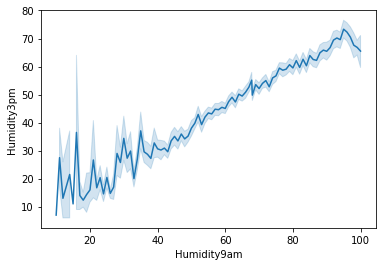

In [55]:
sns.lineplot(x='Humidity9am',y='Humidity3pm',data=data)
plt.show()

- As we know that, humidity increase then possibility of rainfall also increases.
- As per grapth both feartures are having linear relationship with each others.
- It means as humidity at 9 as same range of humidity at 3 pm.

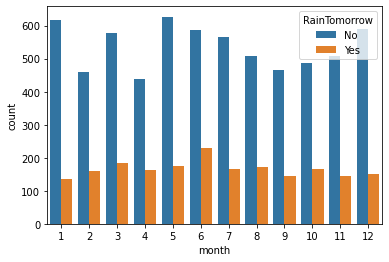

In [56]:
sns.countplot(x='month', hue='RainTomorrow',data=data)
plt.show()

- May has maximum possibility of no rainfall. Bwecause the sky is completelty clean in this month and humidity may low so that, no or poor humidity due to this no rainfall in this month.
- But in july has high chance of precipitation.

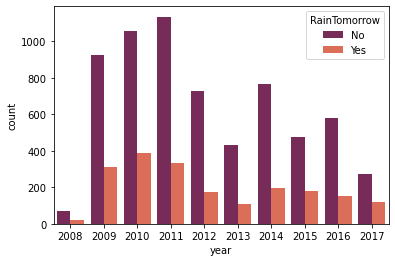

In [57]:
sns.countplot(x='year',hue='RainTomorrow',data=data, palette='rocket')
plt.show()

- In 2010 there is high rainfall than others year. Bu we can observed here precipitation rate is decreasing.
- Due to this prediction of rainfall also decreasing. 

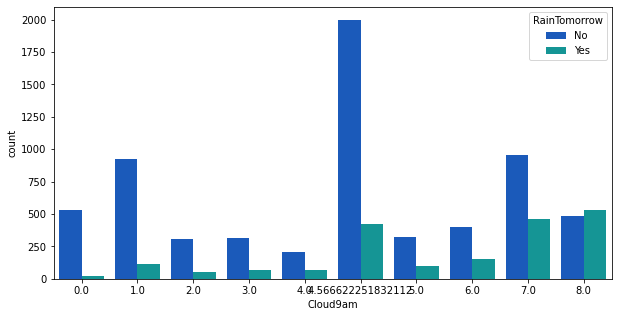

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='Cloud9am',hue='RainTomorrow',data=data, palette='winter')
plt.show()

- At Cloud 5 has maximum no rainfall and at 8 cloud has highest rainfall than others.

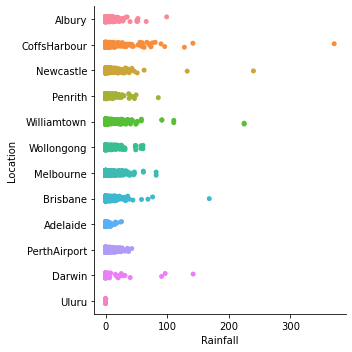

In [59]:

sns.catplot(y='Location',x='Rainfall',data=data)
plt.show()

- From above we can see, CoffdHarbour has maximum rainfall than others.
- Whereas Uluru has lowest rainfalls than others.

### 3.5 Multivariate Analysis

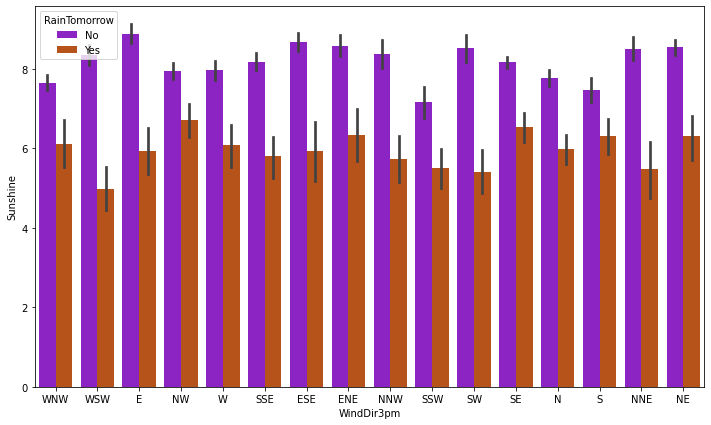

In [60]:
plt.figure(figsize=(12,7))
sns.barplot(x='WindDir3pm', y='Sunshine',hue='RainTomorrow',data=data,palette='gnuplot')
plt.show()

- Average sunshine will be tomorrow is 5. Where East has maximum chance that tomorrow will be East direction of wind.
- Similary, according to graph it has low chance for rainfall.

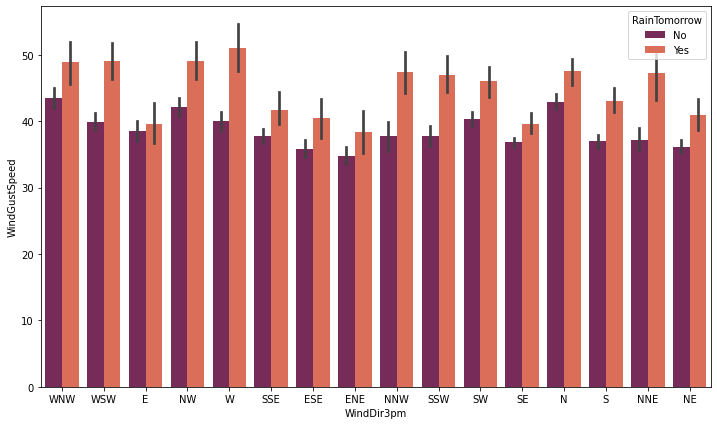

In [61]:
plt.figure(figsize=(12,7))
sns.barplot(x='WindDir3pm', y='WindGustSpeed',hue='RainTomorrow',data=data,palette='rocket')
plt.show()

- We can see, West direction of wind it has maximum chance of wind direction but possibilities between Yes and No has close. But Wind speed for all direction is more than 38 km/hr.
- So rainfall may come or may not come. 

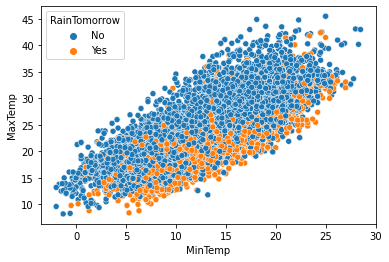

In [62]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=data)
plt.show()

- It has show that, both are having linear relation ship But No rainfall has maximum than rainfall.

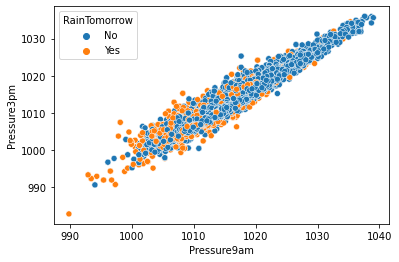

In [63]:
sns.scatterplot(x='Pressure9am',y='Pressure3pm',data=data, hue='RainTomorrow')
plt.show()

- We can see, both features are having relationship, But there is no rainfall tomorrow. It has maximum posibilities comparing to others.


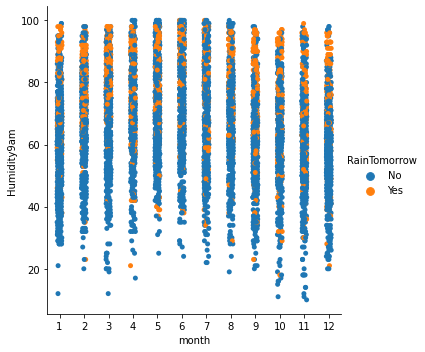

In [64]:
sns.catplot(x='month',y='Humidity9am',hue='RainTomorrow',data=data)
plt.show()

- Humidity is more than 80 in all month. But depending on humidity it does not have a chance of rainfall.
- No rainfall is maximum than Yes rainfall.

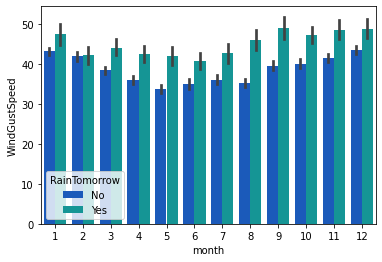

In [65]:
sns. barplot(x='month',y='WindGustSpeed',hue='RainTomorrow',data=data,palette='winter')
plt.show()

- From 5 month to onwords has incresing wind speed. So due to this rainfall chance also increses.
- We can see, all month are having more than 35 kh/hr wind speed.

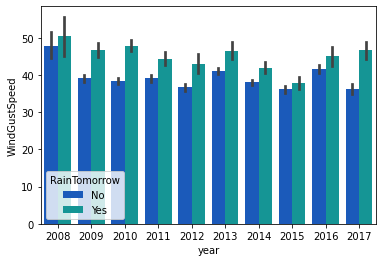

In [66]:
sns. barplot(x='year',y='WindGustSpeed',hue='RainTomorrow',data=data,palette='winter')
plt.show()

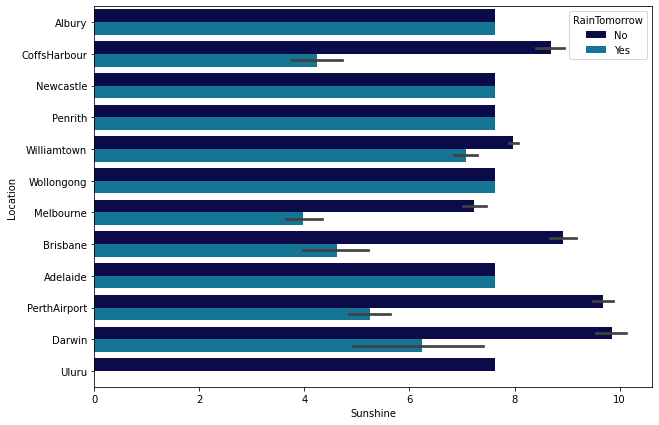

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(y='Location',x='Sunshine',hue='RainTomorrow',data=data,palette='ocean')
plt.show()

- We can see, In Darwin station or near by darwin station sunshine is high and so that is show possibility of rainfall is low.
- But in Wollongong location sunshine is comparitively lower than Darwin location so it show strong possibility of rainfall tomorrow.

<AxesSubplot:xlabel='Location', ylabel='Temp9am'>

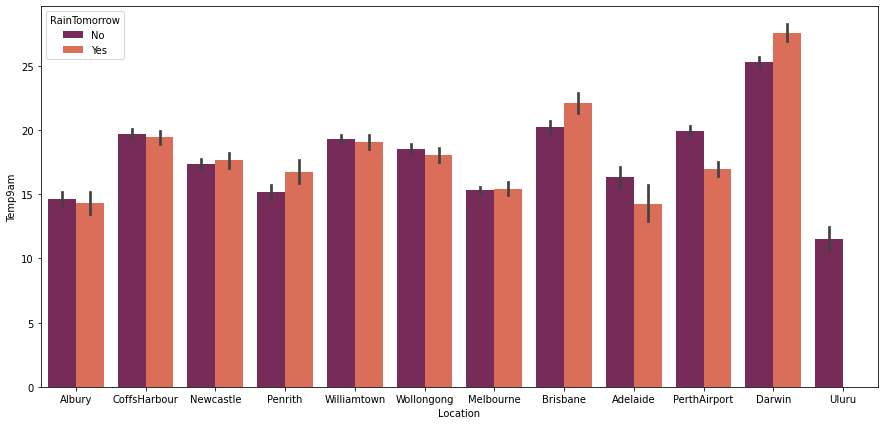

In [68]:
plt.figure(figsize=(15,7))
sns.barplot(x='Location',y='Temp9am', hue='RainTomorrow',data=data, palette = 'rocket')

- In Darwin location temperature at 9 am is high so that posibility of rainfall is also high.
- Similarly In Uluru location posibility of temperature is lower than other so posibility of rainfall also low.

<AxesSubplot:xlabel='year', ylabel='Temp9am'>

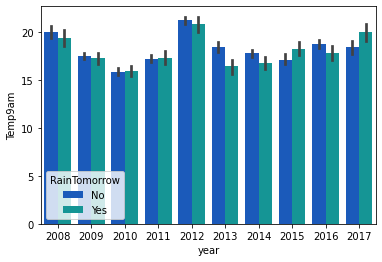

In [69]:

sns.barplot(x='year',y='Temp9am', hue='RainTomorrow',data=data, palette = 'winter')

- In 2012, temperature at 9 am is more than 22 degree c and it also have high rainfall in that year.
- In 2010 temp is lower than other and rainfall also lower than others.

<AxesSubplot:xlabel='Location', ylabel='WindGustSpeed'>

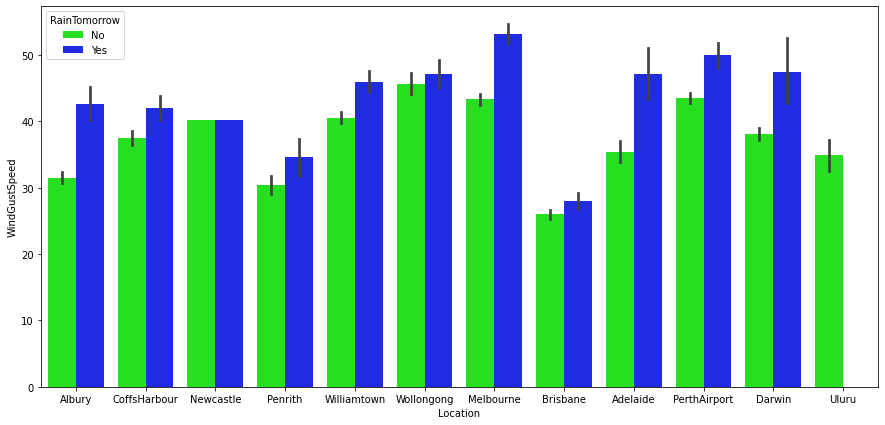

In [70]:
plt.figure(figsize=(15,7))
sns.barplot(x='Location',y='WindGustSpeed', hue='RainTomorrow',data=data, palette = 'hsv')

- We can see, Melbourme has maximum wind speed than others ans it also hgave higher chance of precipitation.
- But ta same Brisbane has lower speed of wind and it also has low chance of rainfalls.
- We can see, average wind speed for all location is more than 25 km/hr.

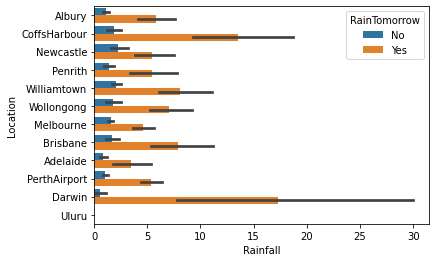

In [71]:
sns.barplot(y='Location',x='Rainfall',data=data,hue='RainTomorrow')
plt.show()

- We can see, Darwin has maximum chance to rainfalls it has also has maximum higher mm in rainfall than others.
- But lowest rainfall in PerthAirport location where rainfall quantit lower than others approximatetly upto 5.

## 4. Encoding of Data

In [72]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [74]:
df_cols=("Location","WindGustDir","WindDir9am","WindDir3pm",'WindDir3pm',"RainToday",'RainTomorrow')
for i in df_cols:
    data[i]=le.fit_transform(data[i])

In [75]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


## 5. Describe the Dataset

In [76]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.591098,...,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320,2012.102433,6.442136,15.741958
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.513596,...,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846,2.473137,3.437994,8.787354
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,3.000000,...,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,...,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000,2011.000000,6.000000,16.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,2017.000000,12.000000,31.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in RainFall, Evaporation and WindGustSpeed is high, columns is considerable indicating presence of outliers.
 - In some features Mean to Standrad of deviation difference is close.
 - In Presure9am and Pressure3pm has mean and std difference is more.

## 6. Correlation of the features with target column

In [77]:
data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
day             -0.015461
year            -0.011066
month           -0.001243
Location         0.002824
WindDir3pm       0.004217
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

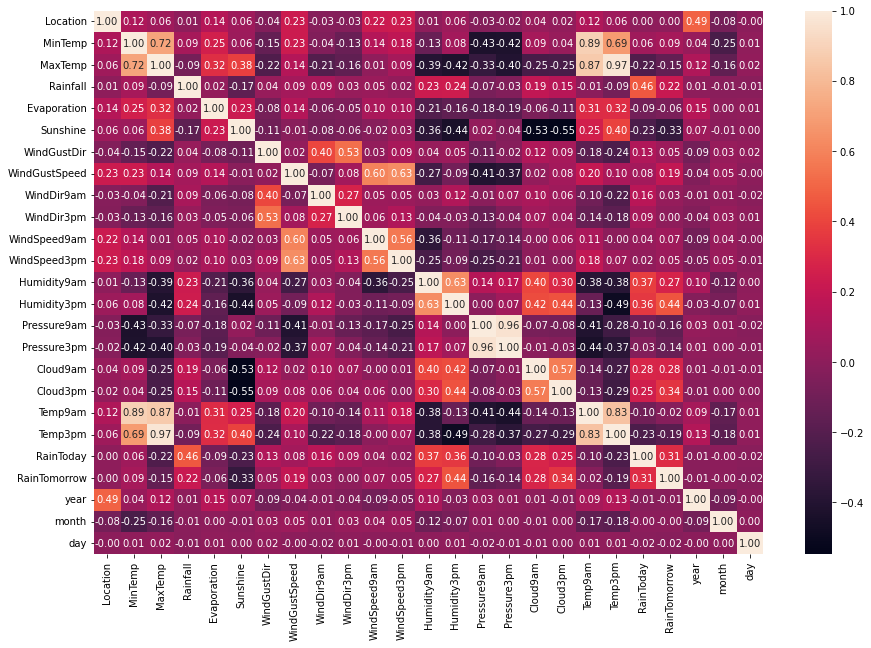

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. MaxTemp has 15% negative correlation with target column.
 2. Sunshine has 33% positive correlation with target column.
 3. Humidity9am has 27% positive correlation with target column.
 4. Humidity3pm has 44% positive correlation with target column.
 5. Cloud9am has 28% positive correlation with target columns.
 6. Cloud3pm has 34% positive correlation with target column.
 7. RainToday has 31% positive correlation with target column.

 #### Features correlation to each other
 
 
 
 1. MinTemp has 69% positive correlation with Temp3pm.
 2. MinTemp has 89% positive correlation with Temp9am.
 3. MaxTemp has 97% positive correlation with Temp3pm.
 4. MaxTemp has 87% positive correlation with Temp9am.
 5. Temp9am has 87% positive correlation with Temp3pm.
 6. Cloud9am has 57% positive correlation with Cloud3pm.
 

## 7. Visualizing correlation of feature columns with label column

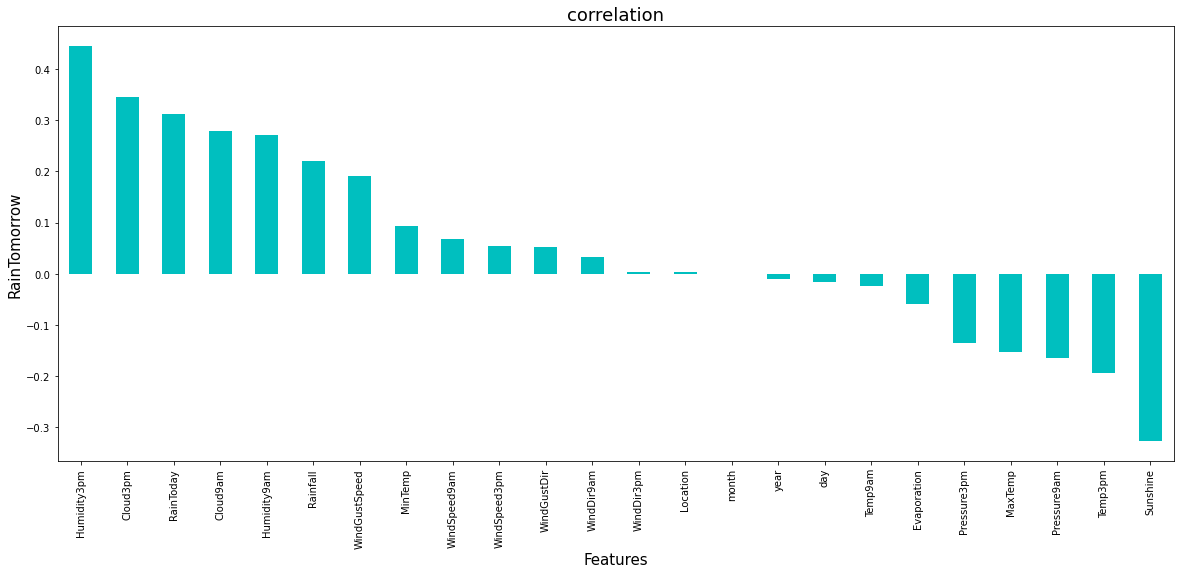

In [79]:
plt.figure(figsize = (20,8))
data.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('RainTomorrow',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that Humidity3pm, Cloud3pm RainToday and Cloud9am have the highest positive correlation with RainTomorrow.
- While Sunshine, Temp3pm and Pressure3pm have the highest negative correlation with RainTomorrow.

## 8. Checking Distribution of data

In [80]:
data.shape

(8425, 25)

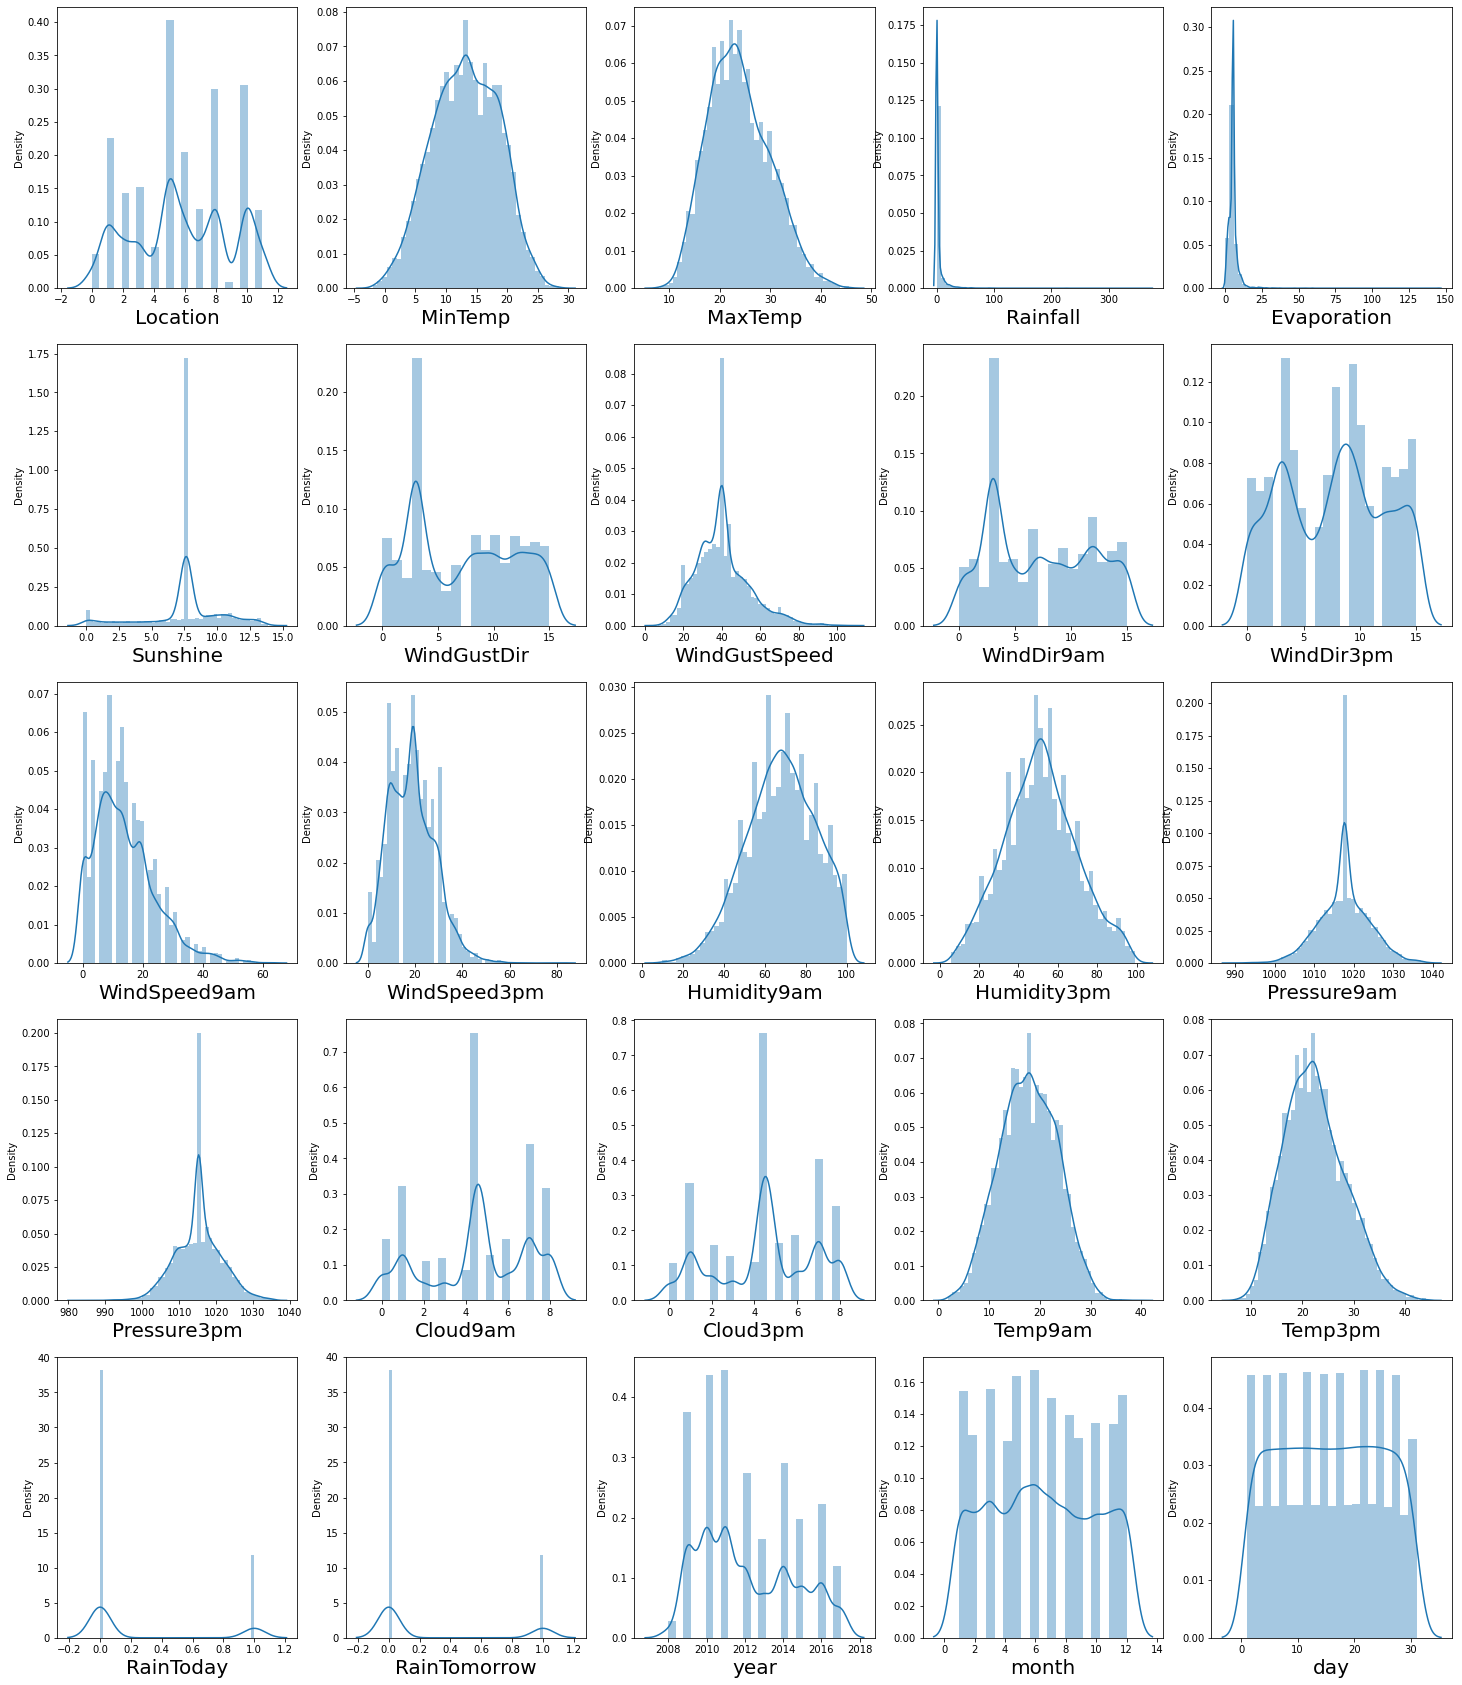

In [81]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, MinTemp, MAxTemp, Humidity3pm, Pressure9am, Temp9am and Temp3pm it seem to normaly distributed.
- WindSpeed9am and WindSpeed3pm has right skewness
- All categorical features are having some skewness.

In [82]:
data.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.012324
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- RainFall, Evaporation, WindSpeed9am and RainToday are having skewness.

## 9. Checking Outliers

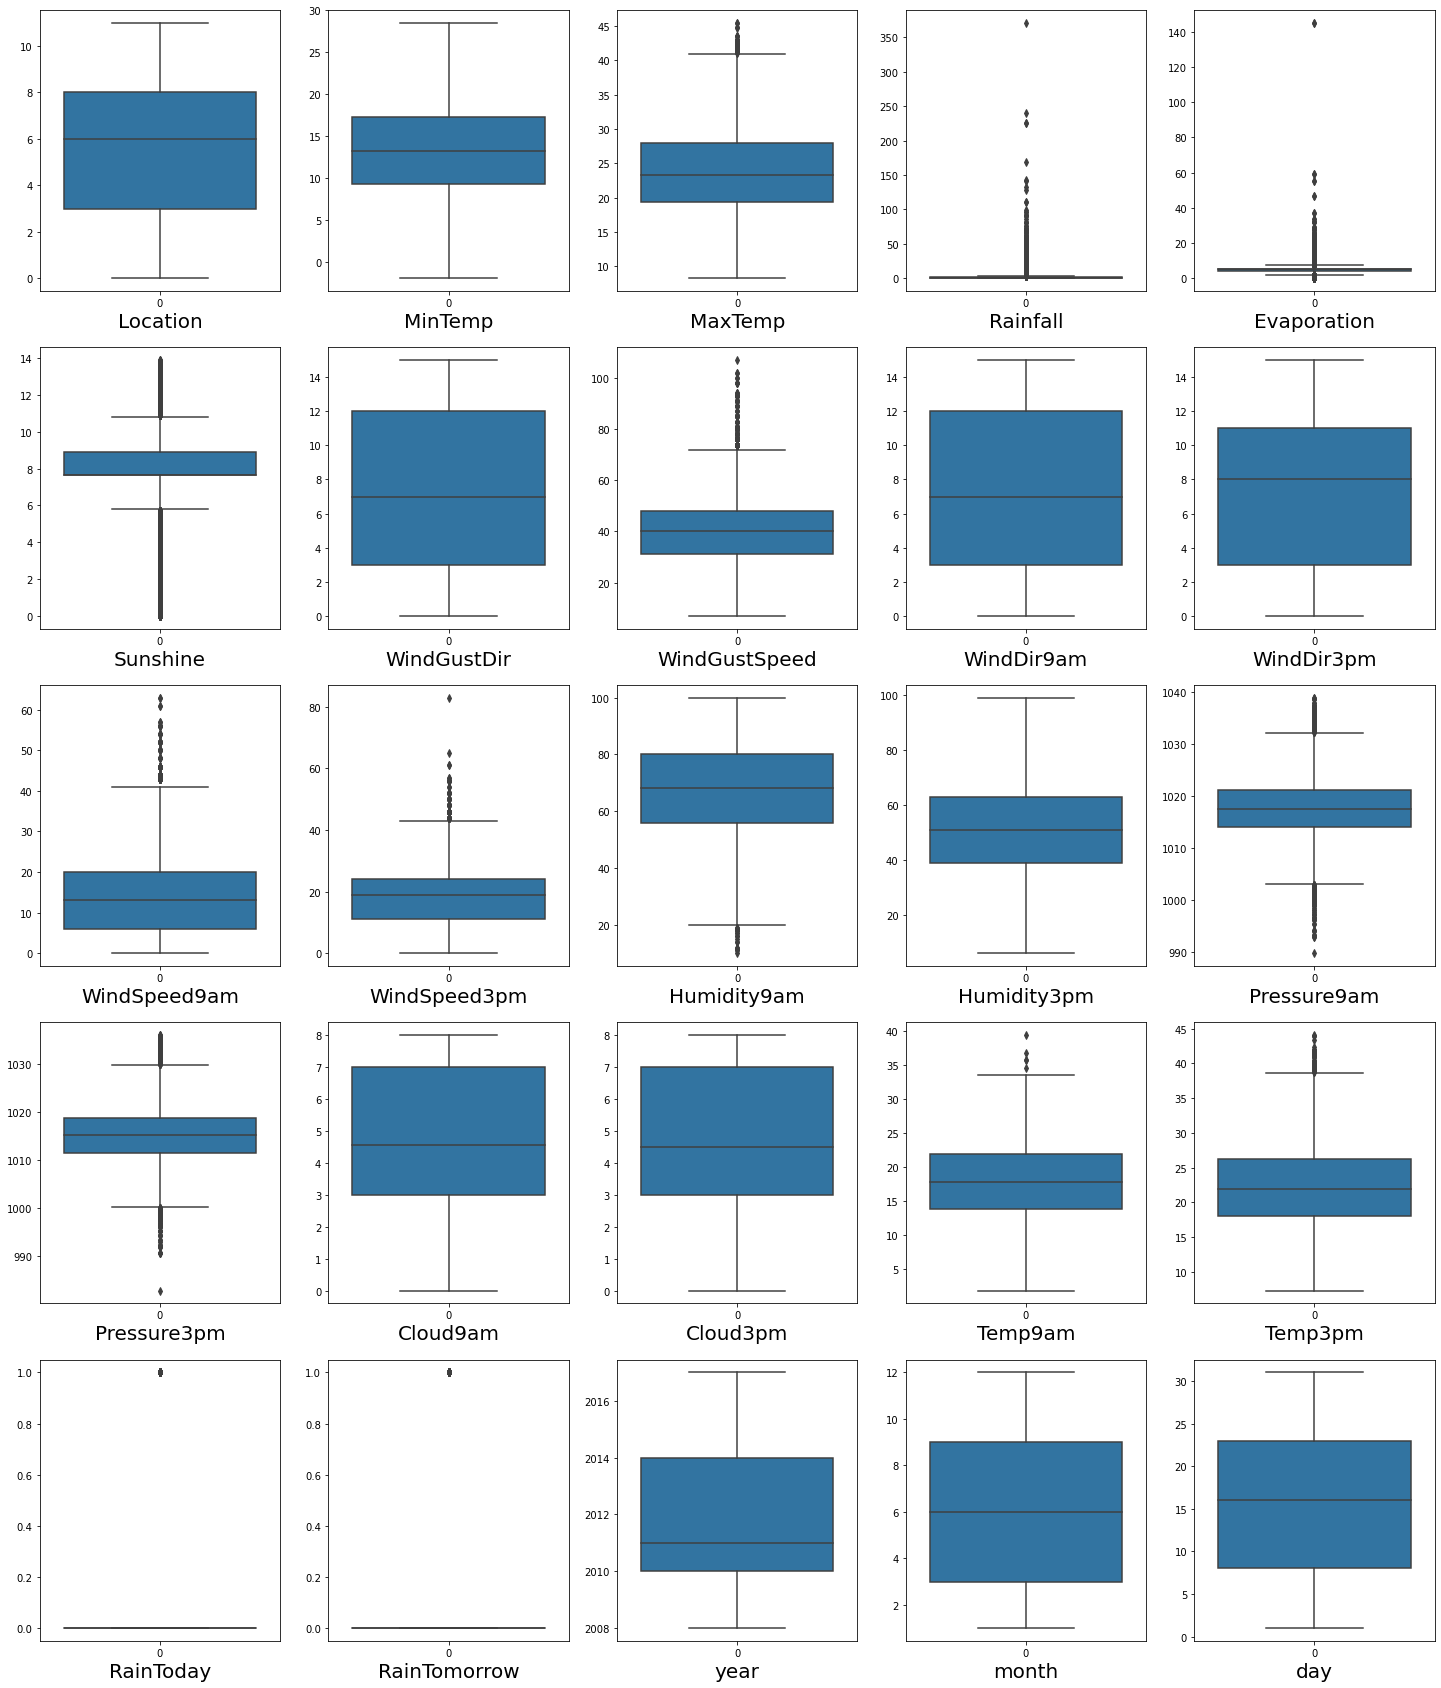

In [83]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=25:
        plt.subplot(5,5,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temppam and Temp3pm are having a more Outliers.
- Some feature are not having outliers but those are categorical features.

### 9.1 Removing Outliers

In [84]:
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2


In [85]:
from scipy.stats import zscore

z_score = zscore(data[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [86]:
df.shape

(7987, 25)

In [87]:
data.shape

(8425, 25)

### 9.2 Percentage of data loss

In [88]:
data_loss = ((8425 - 7987)/8425*100)
print(data_loss,'%')

5.198813056379822 %


#### Data skewness before removing

In [89]:
data.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.012324
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

#### Data skewness after removing Outliers

In [90]:
df.skew()

Location        -0.040284
MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustDir      0.112339
WindGustSpeed    0.506897
WindDir9am       0.160081
WindDir3pm      -0.014739
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
RainToday        1.301170
RainTomorrow     1.296077
year             0.430100
month            0.054460
day              0.002731
dtype: float64

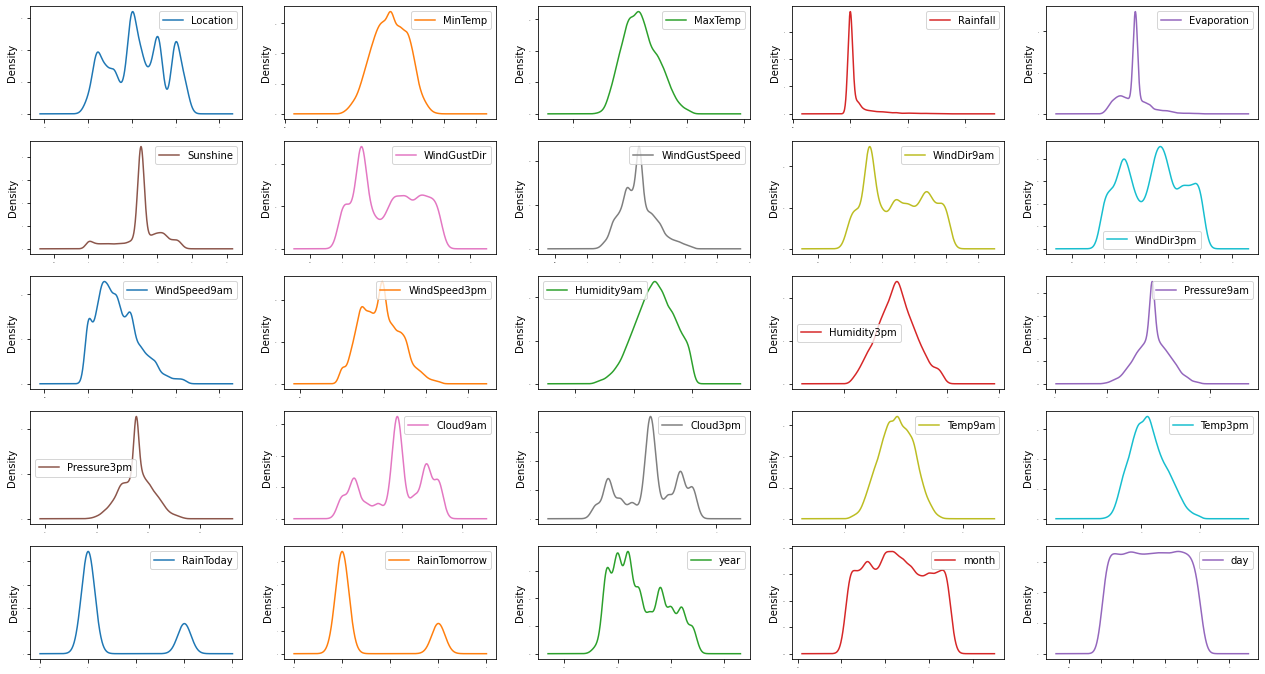

In [91]:
df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

- can see, data is little nornally distributed after removing skewness.

## 10. Checking Multicollinearity

In [92]:
x = df.drop(columns=['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
vif = pd.DataFrame()

In [97]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Location,1.571124
1,MinTemp,8.795820
2,MaxTemp,26.460462
3,Rainfall,1.955499
4,Evaporation,1.542562
5,Sunshine,1.939800
6,WindGustDir,1.649083
7,WindGustSpeed,2.310613
8,WindDir9am,1.353548
9,WindDir3pm,1.525591


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity are exists in MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm.  Based on ANOVA F scores.

### 10.1 Droping columns whose having multicollinearity

In [98]:
df.drop(columns=['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

In [99]:
df.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.503183,0,0,2008,12,1
1,1,7.4,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,4.566622,4.503183,0,0,2008,12,2
2,1,12.9,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,4.566622,2.000000,0,0,2008,12,3
3,1,9.2,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,4.566622,4.503183,0,0,2008,12,4
4,1,17.5,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,0,2008,12,5


In [100]:
x = df.drop(columns=['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [101]:
df.shape

(7987, 20)

In [102]:
data.shape

(8425, 25)

### 10.2 Data Skewness before removing

In [103]:
data.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.012324
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

### 10.3 Data Skewness After Removing

In [104]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [105]:
trans = pd.DataFrame(x)

In [106]:
trans.skew()

0    -0.184130
1    -0.104134
2     0.913570
3     0.074744
4    -0.066262
5    -0.190268
6     0.003128
7    -0.160087
8    -0.221155
9    -0.111481
10   -0.076708
11   -0.063948
12   -0.036039
13   -0.280736
14   -0.218724
15    1.301170
16    0.000000
17   -0.149530
18   -0.213217
dtype: float64

## 11. Building Model for Predicting RainTomorrow(Classification)

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [108]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.56842088,  0.06050157,  0.61739644, ..., -1.66757678,
         1.52402297, -1.8856122 ],
       [-1.56842088, -1.05725282, -0.69366959, ..., -1.66757678,
         1.52402297, -1.70313123],
       [-1.56842088, -0.03222196, -0.69366959, ..., -1.66757678,
         1.52402297, -1.53666415],
       ...,
       [ 1.01632853, -1.43299533, -0.69366959, ...,  1.99906255,
        -0.04671799,  0.83621705],
       [ 1.01632853, -0.98233371, -0.69366959, ...,  1.99906255,
        -0.04671799,  0.93461949],
       [ 1.01632853,  0.33829567, -0.69366959, ...,  1.99906255,
        -0.04671799,  1.03196621]])

## 11.1 Balancing the Data

In [109]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [110]:
smt_y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(smt_x, smt_y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (8631, 19)
Training target vector size: (8631,)
Test feature matrix size: (3699, 19)
Test target vector size: (3699,)


## 11.2 LogisticRegression
### Finding Best Random State

### Finding Best Random Stat

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(smt_x,smt_y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7880508245471749 on Random_state 71


In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(smt_x, smt_y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7880508245471749


Confusion matrix of Logistics Regression : 
 [[1490  390]
 [ 394 1425]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1880
           1       0.79      0.78      0.78      1819

    accuracy                           0.79      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.79      0.79      0.79      3699



#### Finding Optimal value of n_neighbors for KNN

In [114]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.282880942212237
RMSE value for k=  2 is: 0.2880892295162861
RMSE value for k=  3 is: 0.3694907098948053
RMSE value for k=  4 is: 0.3499507554280392
RMSE value for k=  5 is: 0.3845488328055507
RMSE value for k=  6 is: 0.3702216516772631
RMSE value for k=  7 is: 0.3952953936352549
RMSE value for k=  8 is: 0.38066261717655825
RMSE value for k=  9 is: 0.4034187505485256
RMSE value for k=  10 is: 0.3952953936352549
RMSE value for k=  11 is: 0.4087446411522992
RMSE value for k=  12 is: 0.3990391270610635
RMSE value for k=  13 is: 0.41269395646551815
RMSE value for k=  14 is: 0.40375367692464464
RMSE value for k=  15 is: 0.4159564100522201
RMSE value for k=  16 is: 0.41006530579271017
RMSE value for k=  17 is: 0.4208026676532388
RMSE value for k=  18 is: 0.4188708931017547
RMSE value for k=  19 is: 0.42686228281353317
RMSE value for k=  20 is: 0.42432141331835543


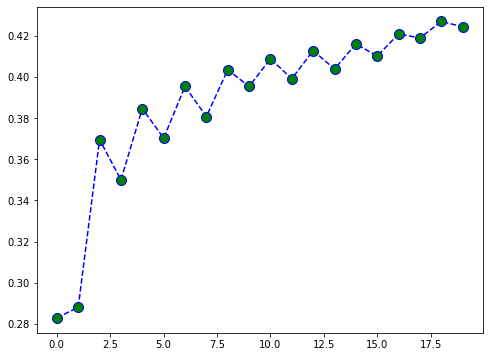

In [115]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k=1, we get the minimum RMSE value which approximately 0.282880942212237, and shoots up on further increasing the k value. We can safely say that k=1 will give us the best result in this case

### Applying other classification algorithm

In [116]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7880508245471749


Confusion matrix : 
 [[1490  390]
 [ 394 1425]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1880
           1       0.79      0.78      0.78      1819

    accuracy                           0.79      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.79      0.79      0.79      3699



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.849418761827521


Confusion matrix : 
 [[1555  325]
 [ 232 1587]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1880
           1       0.83      0.87      0.85      1819

    accuracy                           0.85      3699
   macro avg       0.85      0.85      0.85      3699
weighted avg       0.85      0.85      0.

## CrossValidation :

In [117]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, smt_x, smt_y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.7080292  0.64679643 0.63909165 0.73073804 0.83576642]
Mean Score : 0.7120843471208435
Std deviation : 0.07106631645417343




Cross Validation Score SVC() :

Score : [0.69302514 0.67072182 0.73114355 0.77331711 0.82278994]
Mean Score : 0.7381995133819952
Std deviation : 0.0548316269627797




Cross Validation Score GaussianNB() :

Score : [0.7270884  0.68248175 0.64395783 0.69789132 0.79643147]
Mean Score : 0.7095701540957015
Std deviation : 0.05104298397187384




Cross Validation Score DecisionTreeClassifier() :

Score : [0.63665856 0.67680454 0.88523925 0.83536091 0.77210057]
Mean Score : 0.7612327656123277
Std deviation : 0.09342115219293831




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.70356853 0.69059205 0.79886456 0.81954582 0.78548256]
Mean Score : 0.759610705596107
Std deviation : 0.05235787624016292




Cross Validation Score RandomForestClassifier() :

Score : [0.60421736 0.66545012 0.

 ## 12. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined ExtraTreesClassifier is the best model.

## 13. Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [120]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.809 total time=   0.5s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.818 total time=   0.5s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.825 total time=   0.5s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

[CV 4/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.827 total time=   1.3s
[CV 5/5; 7/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 5/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.824 total time=   1.3s
[CV 1/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 1/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.810 total time=   1.8s
[CV 2/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 2/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.813 total time=   1.8s
[CV 3/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 

[CV 2/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.805 total time=   0.8s
[CV 3/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 3/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.823 total time=   0.9s
[CV 4/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 4/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.821 total time=   0.9s
[CV 5/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 5/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.822 total time=   0.8s
[CV 1/5; 15/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_est

[CV 5/5; 20/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.829 total time=   1.8s
[CV 1/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 1/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.817 total time=   0.4s
[CV 2/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.811 total time=   0.4s
[CV 3/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.827 total time=   0.4s
[CV 4/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 3/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.817 total time=   1.9s
[CV 4/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 4/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.819 total time=   1.7s
[CV 5/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 5/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.826 total time=   2.2s
[CV 1/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 28/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.809 total time=   2.3s
[CV 2/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 1/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.815 total time=   0.8s
[CV 2/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 2/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.813 total time=   0.9s
[CV 3/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.827 total time=   0.9s
[CV 4/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.829 total time=   0.9s
[CV 5/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=

[CV 4/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.825 total time=   2.0s
[CV 5/5; 40/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.828 total time=   2.0s
[CV 1/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.808 total time=   0.4s
[CV 2/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.811 total time=   0.4s
[CV 3/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=

[CV 2/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.809 total time=   1.3s
[CV 3/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.819 total time=   1.3s
[CV 4/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.816 total time=   1.3s
[CV 5/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.818 total time=   1.4s
[CV 1/5; 48/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_est

[CV 5/5; 53/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.914 total time=   0.7s
[CV 1/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.915 total time=   1.6s
[CV 2/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 2/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.918 total time=   1.6s
[CV 3/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 3/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.919 total time=   1.9s
[CV 4/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=

[CV 3/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.911 total time=   3.3s
[CV 4/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 4/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.913 total time=   3.1s
[CV 5/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 5/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.903 total time=   3.2s
[CV 1/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100
[CV 1/5; 61/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.895 total time=   0.7s
[CV 2/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimato

[CV 1/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.921 total time=   2.6s
[CV 2/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 2/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.919 total time=   2.9s
[CV 3/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 3/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.919 total time=   2.5s
[CV 4/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 4/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.921 total time=   2.5s
[CV 5/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=

[CV 4/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.910 total time=   0.6s
[CV 5/5; 73/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 5/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.904 total time=   0.6s
[CV 1/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 1/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.909 total time=   1.4s
[CV 2/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 2/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.906 total time=   1.3s
[CV 3/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 2/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.896 total time=   2.7s
[CV 3/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.911 total time=   2.6s
[CV 4/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.907 total time=   3.2s
[CV 5/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 5/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.894 total time=   2.6s
[CV 1/5; 81/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_esti

[CV 5/5; 86/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.910 total time=   1.6s
[CV 1/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 1/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.917 total time=   2.4s
[CV 2/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 2/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.919 total time=   2.7s
[CV 3/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 3/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.923 total time=   3.2s
[CV 4/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=

[CV 3/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.907 total time=   0.6s
[CV 4/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 4/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.903 total time=   0.6s
[CV 5/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 5/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.896 total time=   0.6s
[CV 1/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200
[CV 1/5; 94/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200;, score=0.894 total time=   1.2s
[CV 2/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_est

[CV 1/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.920 total time=   3.4s
[CV 2/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 2/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.925 total time=   3.4s
[CV 3/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 3/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.924 total time=   3.4s
[CV 4/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 4/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.931 total time=   3.5s
[CV 5/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_est

[CV 4/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.915 total time=   1.5s
[CV 5/5; 106/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200
[CV 5/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.908 total time=   1.4s
[CV 1/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 1/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.914 total time=   2.2s
[CV 2/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 2/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.912 total time=   2.7s
[CV 3/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_est

[CV 2/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.925 total time=   0.7s
[CV 3/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.921 total time=   0.7s
[CV 4/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.926 total time=   0.8s
[CV 5/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 5/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.922 total time=   1.0s
[CV 1/5; 114/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_est

[CV 5/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.919 total time=   3.0s
[CV 1/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.920 total time=   3.2s
[CV 2/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.921 total time=   3.1s
[CV 3/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.922 total time=   3.1s
[CV 4/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_est

[CV 3/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.910 total time=   1.6s
[CV 4/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 4/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.913 total time=   1.3s
[CV 5/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 5/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.904 total time=   1.3s
[CV 1/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 127/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.901 total time=   2.0s
[CV 2/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=1

[CV 1/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.915 total time=   0.7s
[CV 2/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.921 total time=   0.7s
[CV 3/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.924 total time=   0.7s
[CV 4/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.923 total time=   0.7s
[CV 5/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_est

[CV 4/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.918 total time=   2.1s
[CV 5/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.907 total time=   2.3s
[CV 1/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.915 total time=   2.9s
[CV 2/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.910 total time=   2.9s
[CV 3/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_est

[CV 2/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.814 total time=   1.4s
[CV 3/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.817 total time=   1.0s
[CV 4/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.826 total time=   0.9s
[CV 5/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.819 total time=   0.8s
[CV 1/5; 147/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 4/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.827 total time=   1.9s
[CV 5/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.825 total time=   1.8s
[CV 1/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.807 total time=   0.4s
[CV 2/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.809 total time=   0.4s
[CV 3/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 1/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.807 total time=   1.5s
[CV 2/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.799 total time=   1.4s
[CV 3/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.814 total time=   1.2s
[CV 4/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.821 total time=   1.2s
[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=a

[CV 3/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.820 total time=   0.3s
[CV 4/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.827 total time=   0.4s
[CV 5/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.826 total time=   0.4s
[CV 1/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.810 total time=   0.9s
[CV 2/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 5/5; 171/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.821 total time=   1.4s
[CV 1/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.808 total time=   1.8s
[CV 2/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.807 total time=   2.1s
[CV 3/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.819 total time=   1.8s
[CV 4/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 2/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.815 total time=   0.9s
[CV 3/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.828 total time=   0.9s
[CV 4/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.819 total time=   0.9s
[CV 5/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.823 total time=   0.9s
[CV 1/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 4/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.823 total time=   2.3s
[CV 5/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.824 total time=   1.9s
[CV 1/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.805 total time=   0.4s
[CV 2/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.804 total time=   0.4s
[CV 3/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 1/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.810 total time=   1.3s
[CV 2/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.806 total time=   1.3s
[CV 3/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.820 total time=   1.3s
[CV 4/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.822 total time=   1.3s
[CV 5/5; 191/288] START criterion=entropy, max_depth=10, max_features=l

[CV 3/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.919 total time=   0.7s
[CV 4/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.915 total time=   0.9s
[CV 5/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.913 total time=   0.8s
[CV 1/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 198/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.917 total time=   1.5s
[CV 2/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 5/5; 203/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.906 total time=   2.1s
[CV 1/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 1/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.909 total time=   2.9s
[CV 2/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 2/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.908 total time=   2.9s
[CV 3/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 3/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.914 total time=   3.1s
[CV 4/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 2/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.919 total time=   1.8s
[CV 3/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 3/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.922 total time=   2.4s
[CV 4/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 4/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.921 total time=   2.3s
[CV 5/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 5/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.921 total time=   1.8s
[CV 1/5; 211/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 4/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.921 total time=   3.3s
[CV 5/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.918 total time=   4.5s
[CV 1/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.904 total time=   0.7s
[CV 2/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 2/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.906 total time=   0.7s
[CV 3/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 1/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.898 total time=   2.0s
[CV 2/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.896 total time=   2.1s
[CV 3/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.906 total time=   2.3s
[CV 4/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 4/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.905 total time=   2.5s
[CV 5/5; 223/288] START criterion=entropy, max_depth=20, max_features=s

[CV 3/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.917 total time=   0.7s
[CV 4/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.921 total time=   0.7s
[CV 5/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.906 total time=   0.7s
[CV 1/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200
[CV 1/5; 230/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.917 total time=   1.5s
[CV 2/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 5/5; 235/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.904 total time=   2.8s
[CV 1/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.915 total time=   3.5s
[CV 2/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.907 total time=   3.4s
[CV 3/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 3/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.916 total time=   3.7s
[CV 4/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 2/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.921 total time=   1.7s
[CV 3/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.929 total time=   1.7s
[CV 4/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.930 total time=   1.7s
[CV 5/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.926 total time=   1.7s
[CV 1/5; 243/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 4/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.928 total time=   3.3s
[CV 5/5; 248/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.919 total time=   3.3s
[CV 1/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.913 total time=   0.7s
[CV 2/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.908 total time=   0.7s
[CV 3/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 1/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.909 total time=   2.2s
[CV 2/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.910 total time=   2.1s
[CV 3/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.911 total time=   2.1s
[CV 4/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.910 total time=   2.1s
[CV 5/5; 255/288] START criterion=entropy, max_depth=30, max_features=a

[CV 3/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.918 total time=   1.0s
[CV 4/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.922 total time=   1.1s
[CV 5/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.921 total time=   0.7s
[CV 1/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 262/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.925 total time=   1.6s
[CV 2/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 5/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.910 total time=   3.0s
[CV 1/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.914 total time=   3.0s
[CV 2/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.915 total time=   3.0s
[CV 3/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.921 total time=   3.0s
[CV 4/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 2/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.926 total time=   1.7s
[CV 3/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.920 total time=   1.7s
[CV 4/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.925 total time=   1.6s
[CV 5/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.924 total time=   1.6s
[CV 1/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 4/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.924 total time=   3.9s
[CV 5/5; 280/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.919 total time=   3.3s
[CV 1/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.914 total time=   0.7s
[CV 2/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.910 total time=   0.7s
[CV 3/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 1/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.903 total time=   2.1s
[CV 2/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.908 total time=   2.2s
[CV 3/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.913 total time=   2.5s
[CV 4/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.912 total time=   2.1s
[CV 5/5; 287/288] START criterion=entropy, max_depth=30, max_features=l

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [121]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 300}

## 14. Confusion Matrix and ROC_AUC Curve

In [122]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 300, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9416058394160584


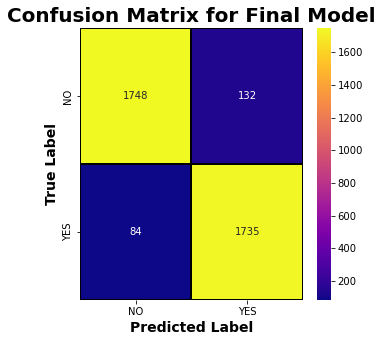

In [123]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

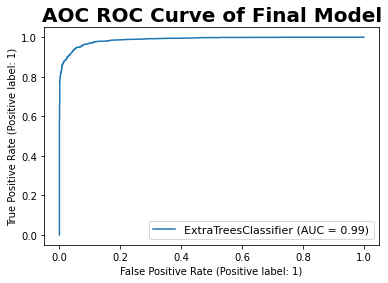

Auc Score :
 0.9418040073456306


In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## 15. Model Save

In [125]:
import pickle
pickle.dump(Final_mod, open('Rainfall','wb'))

### 15.1 Predicting the Rain tomorrow

In [126]:
# Prediction
prediction = Final_mod.predict(X_test)

In [127]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0


# 16. Building Model for Predicting Rainfall (Regression)

In [128]:
df.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.503183,0,0,2008,12,1
1,1,7.4,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,4.566622,4.503183,0,0,2008,12,2
2,1,12.9,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,4.566622,2.000000,0,0,2008,12,3
3,1,9.2,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,4.566622,4.503183,0,0,2008,12,4
4,1,17.5,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,0,2008,12,5


In [129]:
df.shape

(7987, 20)

## 16.1  Checking Multicollinearity

In [130]:
x = df.drop(columns=['Rainfall'],axis=1)
y = df['Rainfall']

In [131]:
x.shape

(7987, 19)

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
vif = pd.DataFrame()

In [136]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Location,1.571506
1,MinTemp,1.458396
2,Evaporation,1.496683
3,Sunshine,1.892046
4,WindGustDir,1.618959
5,WindGustSpeed,2.175749
6,WindDir9am,1.289110
7,WindDir3pm,1.456821
8,WindSpeed9am,1.898445
9,WindSpeed3pm,1.918344


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity not exists Based on ANOVA F scores.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [138]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [139]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.56842088,  0.06050157,  0.18631083, ..., -1.66757678,
         1.52402297, -1.8856122 ],
       [-1.56842088, -1.05725282,  0.18631083, ..., -1.66757678,
         1.52402297, -1.70313123],
       [-1.56842088, -0.03222196,  0.18631083, ..., -1.66757678,
         1.52402297, -1.53666415],
       ...,
       [ 1.01632853, -1.43299533,  0.18631083, ...,  1.99906255,
        -0.04671799,  0.83621705],
       [ 1.01632853, -0.98233371,  0.18631083, ...,  1.99906255,
        -0.04671799,  0.93461949],
       [ 1.01632853,  0.33829567,  0.18631083, ...,  1.99906255,
        -0.04671799,  1.03196621]])

## 16.2 Linear Regression
### Finding Best Random State

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5293586393703866 on Random_state 67


In [153]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=67)

In [154]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [155]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,1.116,7.973,2.823667,0.633


#### Cross - Validation of the model

In [157]:
y_pred = lin_reg.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [159]:
for j in range(4,10):
    isscore = cross_val_score(lin_reg,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 47.71859390465115
accuracy_score is:- 52.022201166854984


At cv:- 5
Cross validation score is:- 48.32309646202038
accuracy_score is:- 52.022201166854984


At cv:- 6
Cross validation score is:- 48.08595524331986
accuracy_score is:- 52.022201166854984


At cv:- 7
Cross validation score is:- 47.99463543598289
accuracy_score is:- 52.022201166854984


At cv:- 8
Cross validation score is:- 48.125471601197646
accuracy_score is:- 52.022201166854984


At cv:- 9
Cross validation score is:- 48.10425252383374
accuracy_score is:- 52.022201166854984




In [160]:
lsscore_selected = cross_val_score(lin_reg,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.4810425252383374 
The accuracy score is:  0.5202220116685499


### RandomForest Regressor

#### Finding Best Random State

In [161]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.674447181413232 on Random State 137


In [163]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=137)

In [164]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [165]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,1.069,7.225,2.687862,0.676


#### Cross - Validation of the model

In [166]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [167]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 48.86083457517134
accuracy_score is:- 67.5169070886004


At cv:- 5
Cross validation score is:- 56.55754942843987
accuracy_score is:- 67.5169070886004


At cv:- 6
Cross validation score is:- 57.455013016260494
accuracy_score is:- 67.5169070886004


At cv:- 7
Cross validation score is:- 59.42964252055397
accuracy_score is:- 67.5169070886004


At cv:- 8
Cross validation score is:- 60.07026772399383
accuracy_score is:- 67.5169070886004


At cv:- 9
Cross validation score is:- 63.749068086506234
accuracy_score is:- 67.5169070886004




In [168]:
lsscore_selected = cross_val_score(rf,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6360542584435995 
The accuracy score is:  0.6751690708860041


### Gradient Boosting Regressor

#### Finding Best Random State

In [170]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5709315025764978 on Random State 195


In [171]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=195)

In [172]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [173]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,1.366,9.971,3.157675,0.569


#### Cross-validation of the model

In [174]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [175]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 47.848883233677775
accuracy_score is:- 57.04833476607145


At cv:- 5
Cross validation score is:- 49.63555247485291
accuracy_score is:- 57.04833476607145


At cv:- 6
Cross validation score is:- 50.507321662390815
accuracy_score is:- 57.04833476607145


At cv:- 7
Cross validation score is:- 50.81164880314268
accuracy_score is:- 57.04833476607145


At cv:- 8
Cross validation score is:- 50.961888466588775
accuracy_score is:- 57.04833476607145


At cv:- 9
Cross validation score is:- 52.36955672181403
accuracy_score is:- 57.04833476607145




In [176]:
lsscore_selected = cross_val_score(gbr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.5237479858126786 
The accuracy score is:  0.5704833476607145


### KNeighbors Regressor

#### Finding Best Random State

In [177]:
from sklearn.neighbors import KNeighborsRegressor

In [180]:
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5492709716538786 on Random State 137


In [181]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=137)

In [182]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [183]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,1.282,10.057,3.171289,0.549


#### Cross-validation of the model

In [184]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [185]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 41.39205316671498
accuracy_score is:- 54.92709716538786


At cv:- 5
Cross validation score is:- 43.40215807203266
accuracy_score is:- 54.92709716538786


At cv:- 6
Cross validation score is:- 44.86425680115333
accuracy_score is:- 54.92709716538786


At cv:- 7
Cross validation score is:- 44.97599761374567
accuracy_score is:- 54.92709716538786


At cv:- 8
Cross validation score is:- 46.5479445198623
accuracy_score is:- 54.92709716538786


At cv:- 9
Cross validation score is:- 48.930698343596546
accuracy_score is:- 54.92709716538786




In [186]:
lsscore_selected = cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.48930698343596546 
The accuracy score is:  0.5492709716538786


### XGBRegressor

#### Finding Best Random State

In [187]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6547518042278307 on Random State 79


In [188]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=79)

In [189]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [190]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,1.082,7.004,2.64652,0.655


#### Cross-validation of the model

In [191]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [192]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 40.476690029395606
accuracy_score is:- 65.47518042278307


At cv:- 5
Cross validation score is:- 50.93906946950483
accuracy_score is:- 65.47518042278307


At cv:- 6
Cross validation score is:- 52.762981518832206
accuracy_score is:- 65.47518042278307


At cv:- 7
Cross validation score is:- 53.38931331240595
accuracy_score is:- 65.47518042278307


At cv:- 8
Cross validation score is:- 56.76673023224096
accuracy_score is:- 65.47518042278307


At cv:- 9
Cross validation score is:- 60.11072910305182
accuracy_score is:- 65.47518042278307




In [193]:
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6011072910305182 
The accuracy score is:  0.6547518042278307


### Ridge

In [194]:
from sklearn.linear_model import Ridge

#### Finding Best Random State

In [195]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    R = Ridge()
    R.fit(X_train, y_train)
    pred = R.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5167499989038451 on Random State 67


In [196]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=67)

In [197]:
regressors = {
    
    'Ridge' : Ridge()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [198]:
results

,MAE,MSE,RMSE,R2-score
Ridge,1.552,10.495,3.239644,0.517


#### Cross Validation of Model

In [199]:
R=Ridge()
R.fit(X_train,y_train)

y_pred = R.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [200]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 40.476690029395606
accuracy_score is:- 51.67499989038451


At cv:- 5
Cross validation score is:- 50.93906946950483
accuracy_score is:- 51.67499989038451


At cv:- 6
Cross validation score is:- 52.762981518832206
accuracy_score is:- 51.67499989038451


At cv:- 7
Cross validation score is:- 53.38931331240595
accuracy_score is:- 51.67499989038451


At cv:- 8
Cross validation score is:- 56.76673023224096
accuracy_score is:- 51.67499989038451


At cv:- 9
Cross validation score is:- 60.11072910305182
accuracy_score is:- 51.67499989038451




In [201]:
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6011072910305182 
The accuracy score is:  0.5167499989038451


### Selecting The Best Model

#### Based on comparing Accuracy Score results with Cross Validation results, it is determined RandomForest Regressor is the best model. It has least difference between accuracy score and cross validation.

### Hyperparameter tuning

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [203]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=875)

In [204]:
rf = RandomForestRegressor()

In [205]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
             }

In [206]:
grd = GridSearchCV(rf,param_grid=parameters)

In [208]:
rf = RandomForestRegressor(min_samples_split=2, min_samples_leaf=1,n_estimators=500,max_features='auto')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

0.6851455583295067


### Plot Actual VS Predicted Rainfall

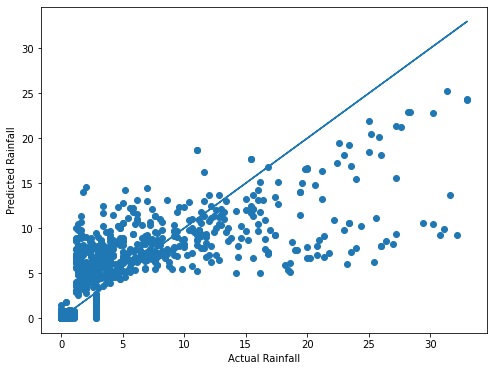

In [209]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

### Model Save

In [210]:
import pickle
pickle.dump(rf, open('Rainfall_Prediction','wb'))

### Predicting the rainfall

In [212]:
Prediction_accuracy = pd.DataFrame({'Predictions': rf.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,0.559001,0.600000
1,0.195955,0.000000
2,0.395332,0.000000
3,0.026435,0.000000
4,0.535957,1.000000
5,0.298237,0.200000
6,0.255907,0.000000
7,0.033635,0.000000
8,0.277614,0.000000
9,3.423400,1.400000
